In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 1.7 MB 26.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 7.3 MB 29.9 MB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.0 which is incompatible.


In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей.

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Первый элемент

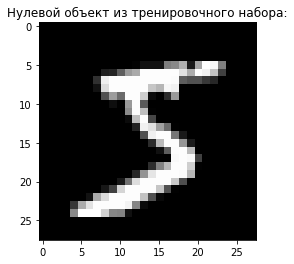

In [4]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

In [5]:
y_train[0]

5

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)

Преобразуем данные

In [7]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

In [27]:
disp = 0.8 + (279307 % 10) / 100;
disp

0.8700000000000001

Уменьшим размерность тестовых данных

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=27, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [29]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
explained_variance

array([0.12 , 0.208, 0.284, 0.35 , 0.41 , 0.463, 0.503, 0.539, 0.573,
       0.602, 0.628, 0.653, 0.674, 0.695, 0.714, 0.733, 0.749, 0.765,
       0.779, 0.794, 0.807, 0.819, 0.831, 0.842, 0.853, 0.864, 0.874])

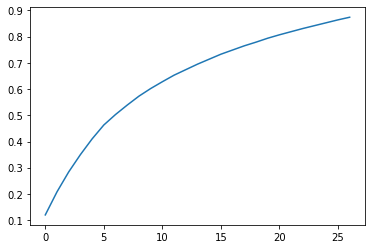

In [30]:
plt.plot(np.arange(27), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [33]:
modelPCA = pca.fit(X_test)
X_test = modelPCA.transform(X_test)
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM

array([[1333,    0,  113,   44,    4,   52,   35,   18,   93,    1],
       [   0, 1765,   62,   12,    3,   31,  104,   77,   16,    5],
       [  84,    9,  812,   61,   54,   85,  501,   24,  118,   15],
       [  32,   12,   56, 1520,   16,   86,    9,   24,   91,   27],
       [   7,    5,   74,    5, 1406,   15,   31,   31,   58,  124],
       [ 125,    7,  169,  192,   62,  609,   15,   53,  332,   27],
       [  38,   23,  720,   19,   12,   23,  774,   47,   93,   17],
       [  50,   34,   15,    5,   45,   37,   75, 1483,   34,  108],
       [  26,   18,  118,  288,   55,  568,   25,   21,  573,   81],
       [  23,   14,   37,   63,  449,   47,   46,  189,  236,  720]])

Число объектов класс 0 отнесенных к классу `номер в ису %9`

In [35]:
var_class = 279307 % 9
var_class

1

In [36]:
CM[var_class][var_class]

1765

Определите Accuracy, Precision, Recall или F1 для обученной модели

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1693
           1       0.94      0.85      0.89      2075
           2       0.37      0.46      0.41      1763
           3       0.69      0.81      0.74      1873
           4       0.67      0.80      0.73      1756
           5       0.39      0.38      0.39      1591
           6       0.48      0.44      0.46      1766
           7       0.75      0.79      0.77      1886
           8       0.35      0.32      0.34      1773
           9       0.64      0.39      0.49      1824

    accuracy                           0.61     18000
   macro avg       0.61      0.60      0.60     18000
weighted avg       0.61      0.61      0.61     18000

